In [1]:
import numpy as np
from numpy.linalg import det ,inv
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

import sys
# setting path
sys.path.append('/Users/voicutu/Documents/GitHub/vdw_evolve/sandbox/vdw')
from genetic import Gen1

import random
random.seed(99)

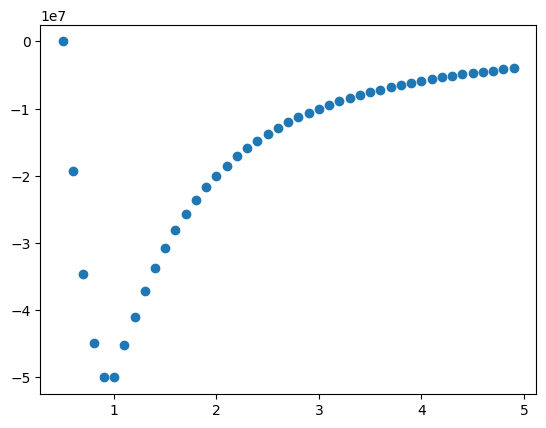

In [2]:
def at_sin(x, up =99999999):
    
    tr_x= (x + 0.5)
    
    if x<1:
        res = up*(1/(1+np.sqrt((x**2))) )* np.sin(tr_x*np.pi) +1/(x+0.00000000000001)
    else:
        res = (x-1)**2 -up*(1/(1+x**2))+1/(x+0.00000000000001)
    return res

X = [i*0.1 for i in range(0,50,1)]
Y= [at_sin(x) for x in X]

plt.scatter(X[5:],Y[5:])

In [3]:
a1 = [1,0]; a2=[0,1];
A  = np.transpose([a1,a2]);

theta =  np.pi/4;
R = [ [ np.cos(theta), -np.sin(theta)], [ np.sin(theta),  np.cos(theta)] ];

#b1 = np.sqrt(2)*np.dot(R,a1);  b2 = np.sqrt(2)*np.dot(R,a2); #a2
b1 = [np.sqrt(3),0]; b2=[0,np.sqrt(3)];

B  = np.transpose([b1,b2]);

a = A#np.array([[0,1],[1,0]])
b = B#np.array([[0,5],[5,0]])

In [4]:

eps = 0.0001

bond=10

def tAtB(params):
    tA = np.array([[params[0],params[1]],
                   [params[2],params[3]]])
    
    tB = np.dot(np.dot(tA,a), inv(b)) # tAa=tBb
    
    return tA, tB
          
def fit_fucntion(params , k_p=999):
          
        tA, tB= tAtB(params)
        tAa= np.dot(tA,a)
        tBb= np.dot(tB,b)
        
        # main condition
        zero_mat= tAa - tBb
        s=0
        for row in zero_mat:
            for e in row:
                s+=e*e
        
        # mimimum TA
        detTAa= det(tAa)*det(tAa) # minimum but biger than 0
        detTBb= det(tBb)*det(tBb)
        
        # TB integer 
        cons =9999999
        tB_con = 0  
        for row in tB:
            for e in row:
                tB_con += ((round(e)-e))*((round(e)-e)) # e*e
        tB_con = tB_con*cons
        
        tA_lenghth =((tA[0][0]**2+tA[0][1]**2)+(tA[1][0]**2+tA[1][1]**2) )*100
        
        
        f =  at_sin(detTAa)+ tB_con**2 +tA_lenghth
        #((1-detTAa)**2)*k_p + tB_con**2
        
        
        return f 

In [5]:
# Experiment settings

#Hyperparameters of the model
model_par = {
    
    'cell_split_number': 2, 
    'subjects_in_cell': 3,

    'nr_clones': 10,
    'mutation_gaussian_sd': 4,

    'pins': 7,
    'gene_quality': 1,
    
}




input_size = 4 # P=[tA00,tA01,tA10,tA11]

bounds =[[-bond,bond]for _ in range(input_size)] # searching intervals for the solution

# Experiment
experiment = Gen1(fit_fucntion ,input_size, bounds, model_par)

In [6]:
## Automate evolution

nr_epochs = 90
last_generation = experiment.evolve(nr_epochs)
fit = [fit_fucntion(x) for x in last_generation] 
print("fit:",fit)


Epochs 0/90
perf [-2111551444094.7485, -1216003131431.177, -84607043520.31966, -1017754075945.1447, -2922810650509.2534, -84621290428.60994, -949597187354.9368, -2500734027975.8623, -2316125943540.358, -2610607698702.904, -161568950893.89606, -2161782122637.1345, -4386482531293.9453, -1215953131930.672, -2161783500061.1968, -775439734166.6002, -775432087710.89, -2922812561507.8667, -433570509864.0592, -566004647186.7285, -1216003837387.787, -1557904756158.9448, -148038488278.72885, -540446031432.11584, -2864355248425.9365, -1942204801171.5754, -389476475341.8799, -1515306600576.5225, -148038523898.7097, -4173166095690.3057, -916404445501.6068, -1088272746362.3352, -1293043353484.8472, -2981900453907.4053, -3798389208258.097, -3798394839716.7705, -775442700293.2792, -3731709484514.7603, -1601193037154.247, -983380478984.9564, -74906472073.3466, -389476475341.88, -1755268002578.311, -26446037973.399994, -1894521989195.8625, -2666425143872.0293, -2922810724659.18, -2555377906107.281]
Epoc

perf [-592154096882.8853, -3252649803184.995, -1431881901356.3533, -2500734907472.3325, -566004647186.7285, -2161783500061.1968, -7717190213709.511, -263183628054.66907, -389476475341.88, -1557904543234.0557, -4713612249381.009, -1292977902923.1575, -775431636335.1652, -161555997902.62183, -8897933520072.553, -2922810669098.1167, -2316157929109.5845, -433585508906.17676, -411218050701.7715, -411218050701.7715, -368324757342.55597, -411218050701.7715, -299712094263.8611, -411218050701.7715, -411218050701.7715, -411218050701.7715, -411218050701.7715, -411218050701.7715]
Epochs 15/90
perf [-592154096882.8853, -2864354488849.1343, -775440417516.3508, -1801092303430.1333, -592154096882.8853, -592154096882.8853, -592154096882.8853, -299712094263.8611, -983386565393.9503, -775431636335.1652, -1017797006166.4083, -148038488278.72894, -775439734166.6002, -411218050701.7715, -411218404099.78033, -6930308829175.634, -1644937627518.5884, -2981857400470.662, -775431636335.1652, -6357851179177.452, 

perf [-148038488278.72885, -4314751936125.4688, -263183628354.67105, -983380933935.2734, -2061909658286.571, -2061909658286.571, -2061909658286.571, -592196972504.5648, -540446543804.91486, -3731707827237.0312, -2555371661824.3145, -566010407067.3643, -1847530070568.374, -592196972504.5648, -411218404099.78033, -1431881901356.3533, -2864355774298.5615, -3731708692164.0205, -515477123511.64874, -515477123511.64874, -74910734246.63947, -515477123511.64874, -515477123511.64874, -368324757342.55597, -515477123511.64874, -515477123511.64874, -515477123511.64874, -515477123511.64874]
Epochs 29/90
perf [-515477123511.64874, -515477123511.64874, -515477123511.64874, -1473299182138.1868, -1755268153883.9856, -2061909658286.571, -716088536211.1298, -515477123511.64874, -515477123511.64874, -1755267995109.99, -2061909658286.571, -1216003290805.1855, -949597187354.9368, -515477123511.64874, -2061909658286.571, -389475756138.2934, -1216003365391.3079, -2061909658286.571, -148038488278.72885, -14803

perf [-566010407067.3643, -3252599610100.679, -411218050701.7715, -540445942022.71606, -2806488285963.3853, -229100728005.18164, -2806488285963.3853, -245844694222.2481, -245844694222.2481, -716088536211.1298, -2922812561507.8667, -1178403024178.2515, -1431881901356.3533, -245844694222.2481, -2061910046668.563, -3665617924061.9263, -1178402948500.267, -3665617924061.9263, -74905363083.98691, -21152888087.10111, -4713612219037.652, -6930308781303.194, -540445838448.3126, -540445838448.3126, -540445838448.3126, -389478455375.0604, -540445838448.3126, -540445838448.3126]
Epochs 43/90
perf [-21152888087.10111, -775442700293.2792, -1473299412382.178, -1431881901356.3533, -3731708049604.537, -2111551377658.0383, -3314928558047.563, -281105961096.9888, -229100728005.18164, -1178403072576.9758, -2806488285963.3853, -2806488285963.3853, -26450299846.6918, -2061910046668.563, -2161783423831.9204, -1801095877973.2568, -745465857411.795, -1216003290805.1855, -245845118524.23093, -389478455375.0604

perf [-515477123511.64874, -161556191486.42923, -2981857876315.9204, -2111551686396.1326, -2161784525744.8857, -3252649803184.995, -74906472073.3466, -148039986586.0809, -148039986586.0809, -2111551783857.6067, -1473299412682.186, -2061909658286.571, -2061909658286.571, -148039986586.0809, -3665617784386.792, -2061909658286.571, -1557909867463.3057, -2061909658286.571, -916404445501.6068, -1473299636788.497, -745464463278.8591, -74905009685.97655, -245845082604.24826, -245845082604.24826, -245845082604.24826, -245845082604.24826, -245845082604.24826, -161568108792.36105]
Epochs 57/90
perf [-148039986586.0809, -1755267606127.9788, -1801094545099.548, -1216005954293.7834, -949597199833.6769, -263183628054.66907, -3252649658599.927, -245845082604.24826, -245845082604.24826, -3798391417096.382, -6930308813277.19, -716088647509.0944, -3314922797266.9014, -245845082604.24826, -983383143373.5764, -5366269838127.377, -2922816449819.8584, -4713612897982.504, -74906472073.3466, -2161786449922.05

perf [-263179920623.0574, -263183628054.66913, -2922818574988.55, -2161785652441.9824, -1473299003423.1006, -1473299003423.1006, -1473299003423.1006, -1186734750.154888, -1186734750.154888, -1847509090238.2568, -983381818818.3158, -566010407067.3644, -1847530070568.3733, -1186734750.154888, -263181841859.83017, -263183628054.66913, -411224259364.7709, -263179920623.0574, -1801092387022.5344, -2212609128794.917, -368324757342.55597, -2922812772338.265, -21152888087.10111, -21152888087.10111, -21152888087.10111, -21152888087.10111, -21152888087.10111, -21152888087.10111]
Epochs 71/90
perf [-245845082604.24814, -26446037973.399994, -540445838448.3126, -2922810669098.1157, -4314783462721.9155, -5727527885090.2295, -3665617884685.6035, -21152888087.10111, -21152888087.10111, -2922812023187.3623, -2922810752736.338, -4243665479227.4395, -2111551783857.6067, -21152888087.10111, -983380478984.9564, -1216003837387.787, -3314923076491.5664, -618936746210.4789, -263179920623.0574, -263179920623.0

perf [-389477066510.0053, -245845118524.23093, -148038488278.72885, -3377786596447.032, -245845471922.2405, -1755268058507.1194, -1755267995109.9893, -1515306600576.5237, -1755267995109.9893, -618945897586.8678, -389476192919.01794, -716088536211.1298, -592161823458.2087, -368324757342.55597, -515477123511.64874, -2555372050842.3013, -263183628054.66913, -281105961096.9888, -1178403024178.2515, -389475756138.2935, -7021072204193.99, -2864354634034.227, -949597199833.6769, -949597199833.6769, -949597199833.6769, -949597199833.6769, -949597199833.6769, -161555997902.62183]
Epochs 85/90
perf [-389476192919.01794, -4243663995947.812, -5810067560424.716, -745464407503.168, -389477066510.0053, -389477066510.0053, -389477066510.0053, -949597076056.9722, -1254202218879.0916, -2500736095208.719, -1216003290805.1855, -745465857411.795, -245845082604.24814, -161555997902.62183, -7112430964461.228, -245845118524.23093, -1216004630338.5408, -2061910037727.2998, -716088536211.1298, -3377786515515.08

In [7]:
best =last_generation [fit.index(min(fit))]
print(best)

[-9, 0, 0, 7]


In [8]:
P = best #[1, 1, 0, 1]#[2, 0, 0, -1]#[0, -1, -1, 0]#[-1, 1, 0, 1]
tA,tB = tAtB(P)
zero_mat= np.dot(tA,a) - np.dot(tB,b)
print("\n _____\n tA:\n",tA)
print("det:",det(tA))
print("\n _____\n tB:\n",tB)
print("det:",det(tB))
print("\n zero_mat:\n",zero_mat)


 _____
 tA:
 [[-9  0]
 [ 0  7]]
det: -62.99999999999999

 _____
 tB:
 [[-5.19615242  0.        ]
 [ 0.          4.04145188]]
det: -21.00000000000001

 zero_mat:
 [[1.77635684e-15 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]]
